In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression ## for performing the logistic Regression
from sklearn.metrics import accuracy_score ## to obtain the accuracy score
import pandas as pd

In [2]:
redwine=pd.read_csv("wine-quality-red.csv", sep=",")
redwine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Defining the variables:

1.Fixed Acids in wine- Tartaric, Malic, citirc and Succinic acids.

2.Volatile acidity - it is a steam distillable acids present in wine. Primarily it has acetic acid but also lactic, formic, butyric and Propionic acids where hese compounds have much lower sensory threshold than acetic acid—both acetaldehyde and ethyl acetate are detectable at less than #200 mg/L in wine.

~U.S. legal limits of Volatile Acidity: 
Red Table Wine #1.2 g/L

3.Citric acid- it has a concentration nearly to #1/20 that of tartaric acid.

4.Residual Sugar from natural grape sugars leftover in a wine after the alcoholic fermentation finishes.  So for a wine with 10 grams per liter of residual sugar has 1% sweetness or a total of ~1.8 carbohydrates per serving (5 ounces / 150 g).

5.chlorides- The amount of salt in the wine.Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over #50 ppm, SO2 becomes evident in the nose and taste of wine. ppm = mass solute (mg) ÷ volume solution (L) so it is measured in #mgs

6,7.free and Total sulpur dioxide- It divides into parts with the major ones being the molecular form and the
bisulfite form. Certain “free” SO2 levels are needed to insure the target amounts of molecular SO2 are maintained. Rule of thumb to use Sulpur dioxide is 1.5 grams (1/4 tsp.) per five (5) gallons for 2 or 3 times the wine is racked.

total SO2 of #0.015 g/litre in red wines. 0.005 g/l  of molecular SO2 is considered the needed amount for red wine.

#### It is mandatory to include 'contains sulphites' on the label if total SO2 is over 0.0001 g/litre.

8.Density- i am asuming as i have taken #mg in chlorides i use the matrix of #mg and cubic millimeter where density = 1.01 in actual and we have the max =1.0036

#### where cubic millimeter= 1 littre
9.pH - has scale of 0 -14 and measure of hydrogen ion concentration.

10.Sulphate- The maximum levels of sulfur dioxide that a wine can contain #160 ppm for red wine

11.Alchol- The alcohol content usually ranges from #12–15%

12.Class- it is the score ranges form #0-10

## Source:
https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity#:~:targetText=Volatile%20acidity%20refers%20to%20the,%2C%20butyric%2C%20and%20propionic%20acids.&targetText=These%20compounds%20have%20much%20lower,200%20mg%2FL%20in%20wine. 

https://www.aqua-calc.com/page/density-table/substance/vinegar-coma-and-blank-red-blank-wine

https://www.healthline.com/nutrition/red-wine-good-or-bad

http://www.piwine.com/media/home-wine-making-basics/using_sulfur_dioxide.pdf

In [3]:
redwine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
class                   1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
redwine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Normal distribution of features

In above all the features values standard measuring units are not given in the data set. In case of making assumption regarding standard measuring units it will give false or irrelevant interpretation. It may be overvalued or undervalued in case of making assumption.Out of 11 only 1 ph value have standard measuring unit.It varies between 3-3.4 acidic value for wine.

Mean value is 3.21 which represents more acidic.

Rest of the feature standard measure units will vary with according to location,legal norms,ph value,type of wine etc.

## Objective 

From this data set we are trying to find which feature is impacting to  the class level of  wine.For that first we have to see the relationship between the features and class. 

The best way to finding the relationship is correlation. Which will show the relationship how is a relationship between all features and class.

In [6]:
import seaborn as sns

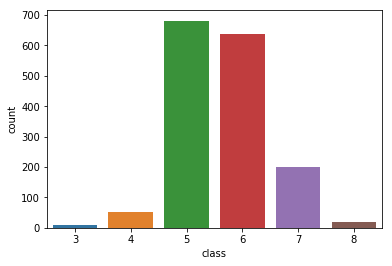

In [7]:
sns.countplot(x='class',data=redwine)

### Class label and Quantity

As here Class is representing ranking of wine quality.We have measuring scale in between 1-7.

From above bar graph,we can analyse that wine quality average is 4.Which we can bin the class into three categroy like
 
 a)  1-3 = 'Poor'
 
 b)  4-5 = 'Good'
 
 c)  6-7 = 'Rich'

In [8]:
bins = [1,3,5,7]
groups = ['Poor','Good','Rich']
redwine['class_level'] = pd.cut(redwine['class'], bins, labels=groups)

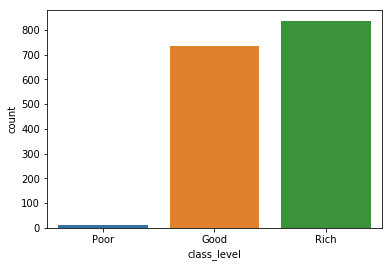

In [9]:
sns.countplot(x='class_level',data=redwine)

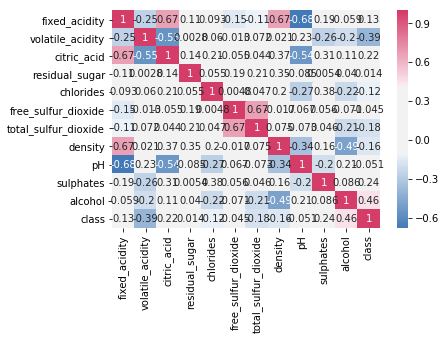

In [10]:
corr = redwine.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] - True

sns.heatmap(corr,cmap=sns.diverging_palette(248, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

In [11]:
redwine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class', 'class_level'],
      dtype='object')

In [12]:
wine=redwine.drop(columns='class_level')

In [13]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')

In [14]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Correlation report for C

As per above figure we can find out how many features are higly or likely to impact the class variable.

Negative Correlation
 
1) Volatile_acidity has negative relationsip with  class

Positive Correlation

1) Alochol and sulphate has positive relationship with Class.


# Feature extraction
 
From the correlation report we found out the dependent and independent variable.  Only alcohol have positive correlation 
with red Wine Class. Which will help us in preparation of prediction model.

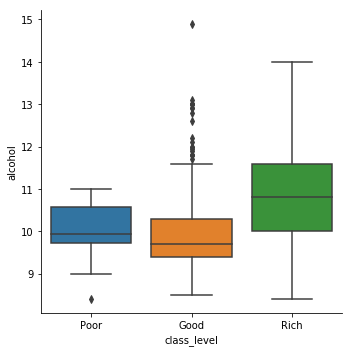

In [17]:
### we are going to plot the using seaborn
import seaborn as sns
sns.catplot(x='class_level',y='alcohol',kind='box', data=redwine)

There are more outliers in regard with good class level which ranges form 3-5. which means alcohol content is more in the wine which is at the class of 3-5


## comparing for the negative relationship between class_level and volatile_acidity

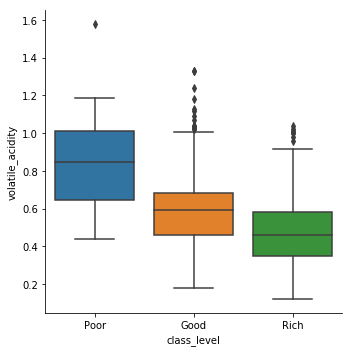

In [20]:
sns.catplot(x='class_level',y='volatile_acidity',kind='box', data=redwine)

In [21]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [80]:
# Use only one feature
X= wine['alcohol']
Y= wine['class']


# Split the data into training/testing sets
x_train = X[:-20]
x_test = X[-20:]

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

In [81]:
lr.fit(x_train,y_train, sample_weight= 20)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.4  9.8  9.8 ... 10.8 11.9 11.3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.4  9.8  9.8 ... 10.8 11.9 11.3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
x_test.shape

(20,)

In [84]:
print(x_test.shape)
print(y_pred.shape)

(20,)
(20,)


## trying to fit a regression line 

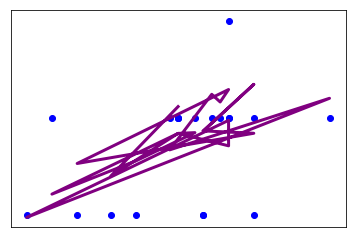

In [85]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='purple', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()